In [21]:
# 1. Import Libraries

!pip install xgboost shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import shap
import xgboost as xgb

In [23]:
# 2. Load and Explore Data
# Load data
df = pd.read_csv("telco_churn.csv")

# Initial data exploration
df.head()
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
#3. Data Cleaning and Preprocessing

# Data cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
print(df['TotalCharges'].isnull().sum())

# Encode categorical variables
label_enc_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaymentMethod'])

df.head()

# Save cleaned data to CSV
df.to_csv("cleaned_churn_data.csv", index=False)

0


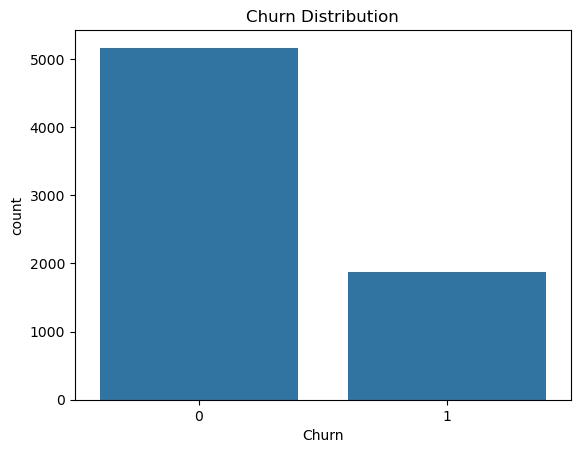

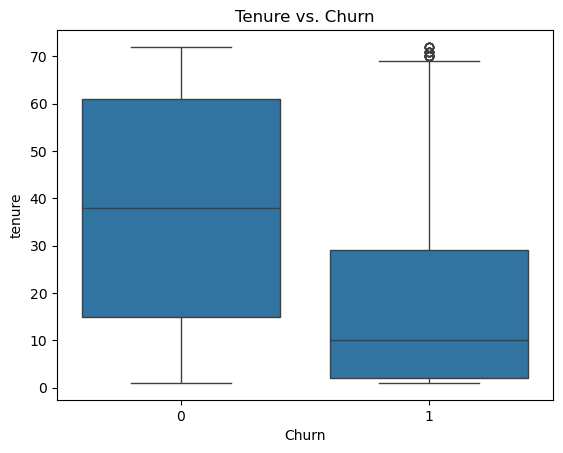

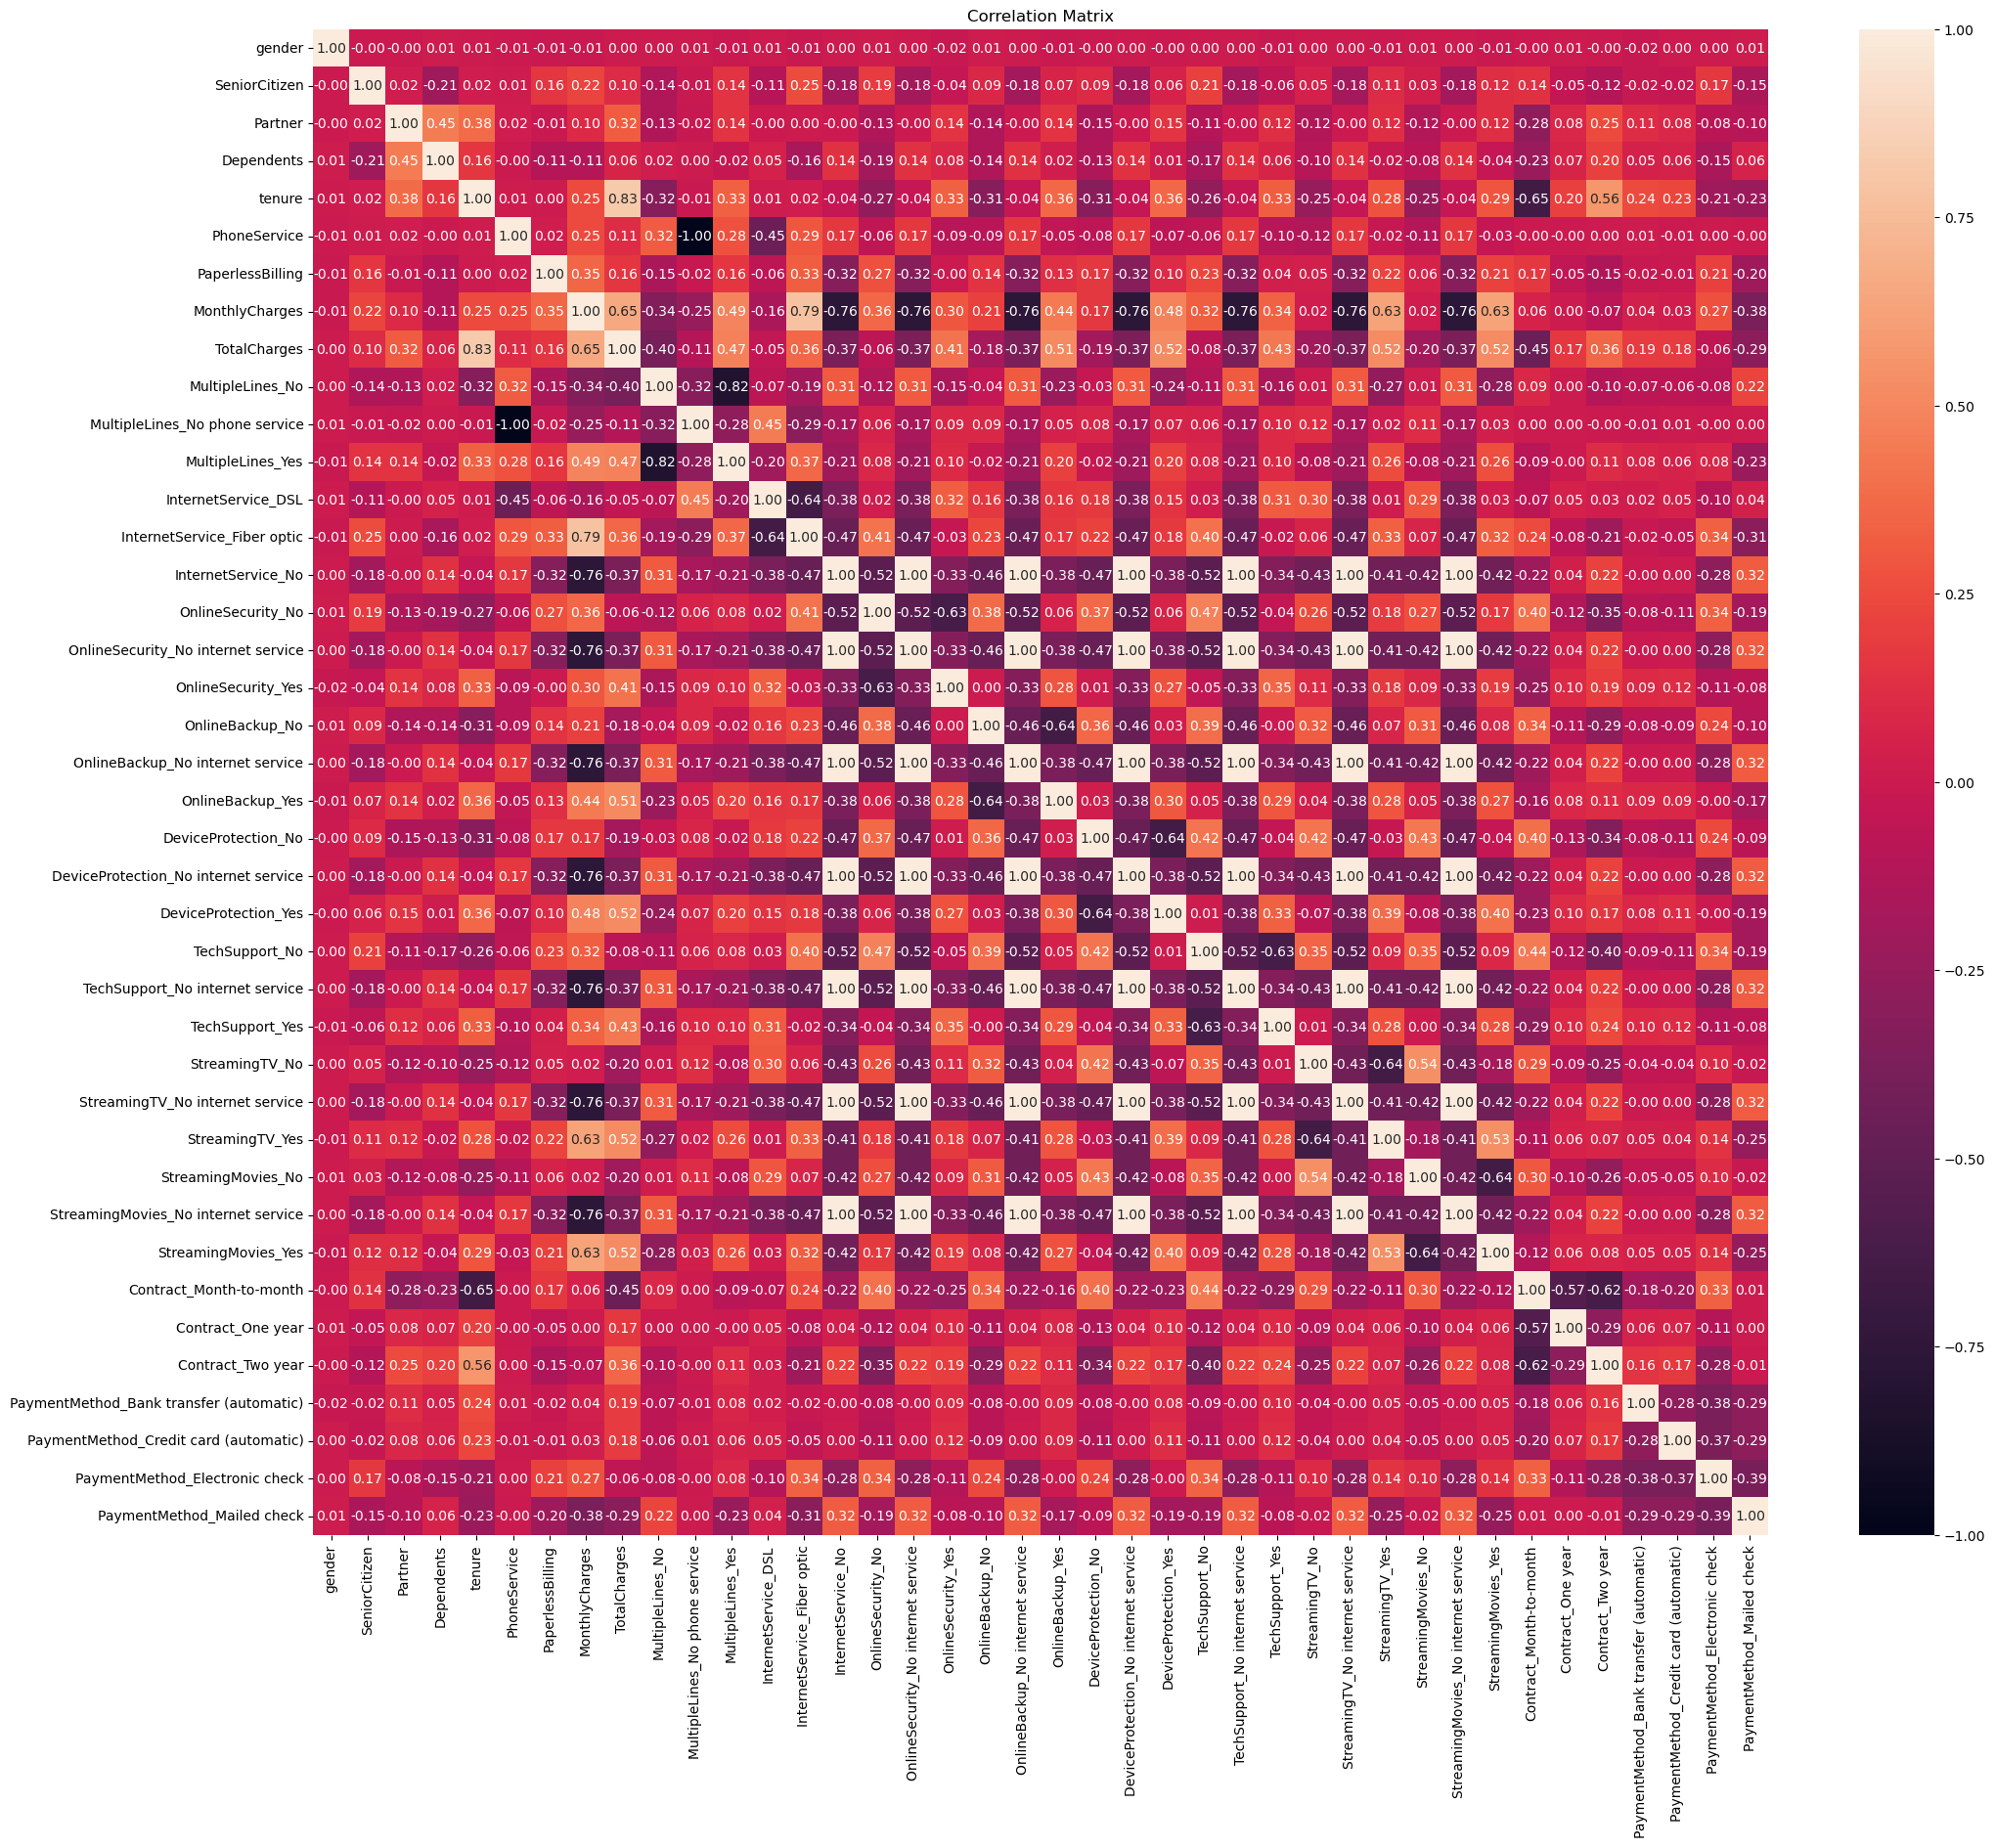

In [6]:
#4. Exploratory Data Analysis

# Exploratory Data Analysis: Churn Distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig("churn_distribution.png")
plt.show()

# Exploratory Data Analysis: Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs. Churn")
plt.savefig("tenure_vs_churn.png")
plt.show()

# Correlation Matrix
df = df.drop(columns=['customerID'], errors='ignore')
corr_matrix = df.drop(columns=['Churn']).corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

In [7]:
#5. Model Training and Evaluation
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7768301350390903


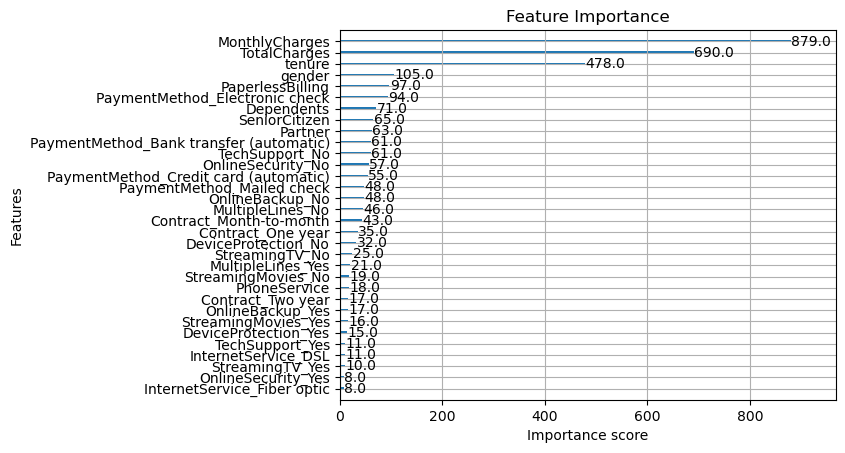

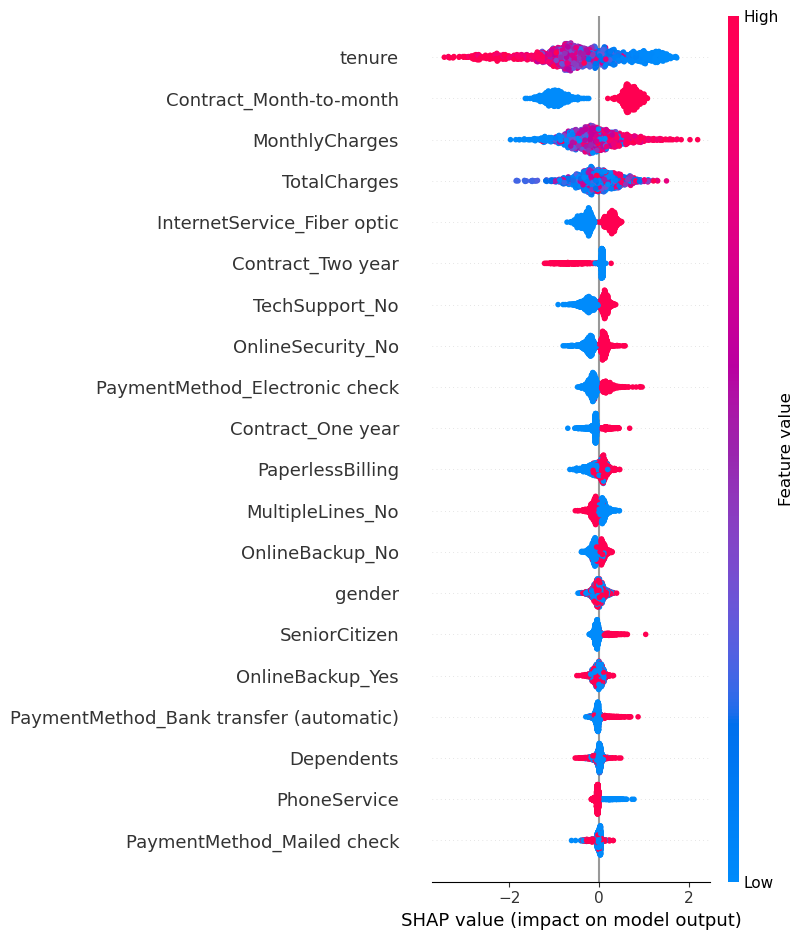

<Figure size 640x480 with 0 Axes>

In [8]:
#6. Feature Importance and SHAP Explainability
# Feature Importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig("shap_summary.png")